In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
df1 = pd.read_csv("C:\\Users\\gagan\\Python Udemy\\PYTHON FOR ML,DS\\06-Capstone-Project\\all_sites_scores.csv")

In [47]:
df2 = pd.read_csv("C:\\Users\\gagan\\Python Udemy\\PYTHON FOR ML,DS\\06-Capstone-Project\\fandango_scrape.csv")

In [48]:
df1

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [49]:
df2

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [51]:
df2.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

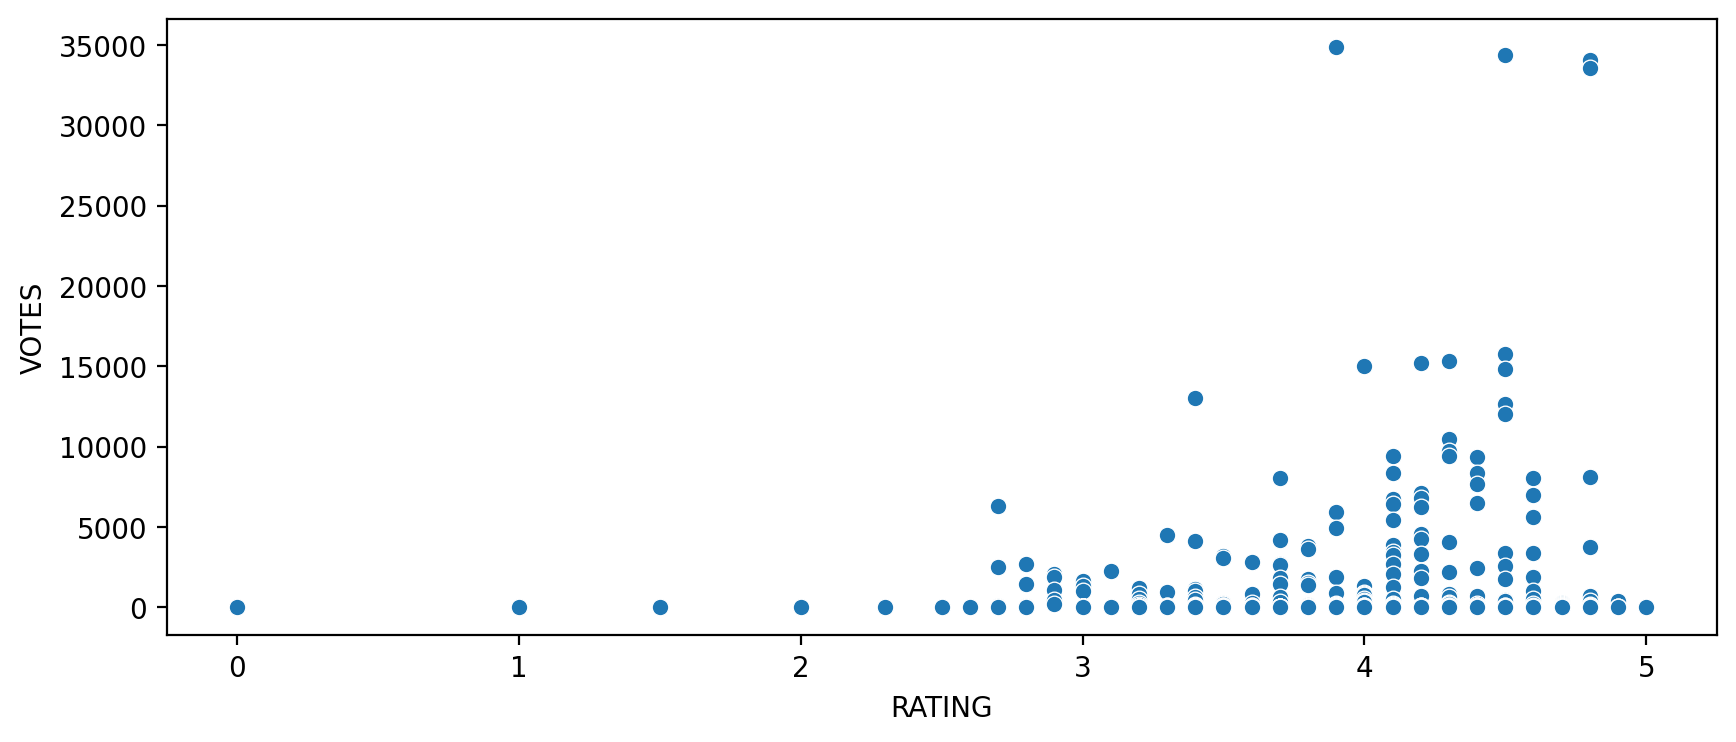

In [52]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df2,x='RATING',y='VOTES')

In [53]:
df2.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [54]:
df2['YEAR']=df2['FILM'].apply(lambda x:x.split('(')[-1]).str.replace(')','')

In [55]:
df2['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

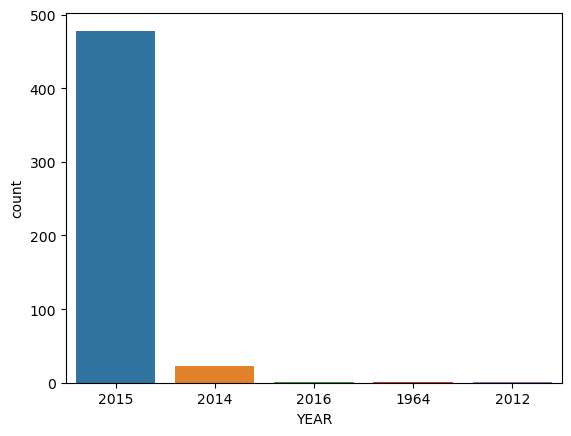

In [56]:
sns.countplot(data=df2,x='YEAR')

In [57]:
df2.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [58]:
(df2['VOTES']==0).sum()

69

In [59]:
df2=df2[df2['VOTES']>0]

In [60]:
df2

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


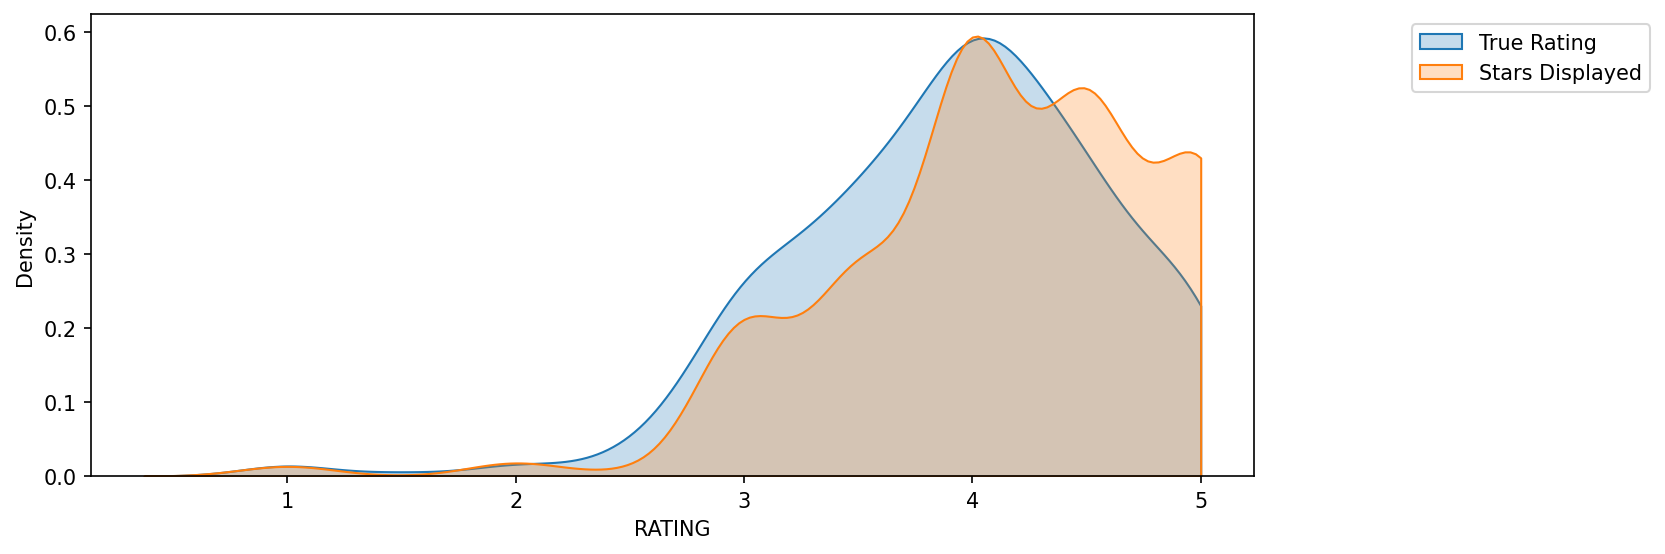

In [61]:
plt.figure(figsize=(10,4),dpi=150)

sns.kdeplot(data=df2,x='RATING',fill=True,label='True Rating',clip=[0,5])
sns.kdeplot(data=df2,x='STARS',fill=True,label='Stars Displayed',clip=[0,5])

plt.legend(bbox_to_anchor=(1.35,1))

In [62]:
df2['STARS DIFF']=((df2['STARS']-df2['RATING']).round(2))

In [63]:
df2

,FILM,STARS,RATING,VOTES,YEAR,STARS DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS DIFF', ylabel='count'>

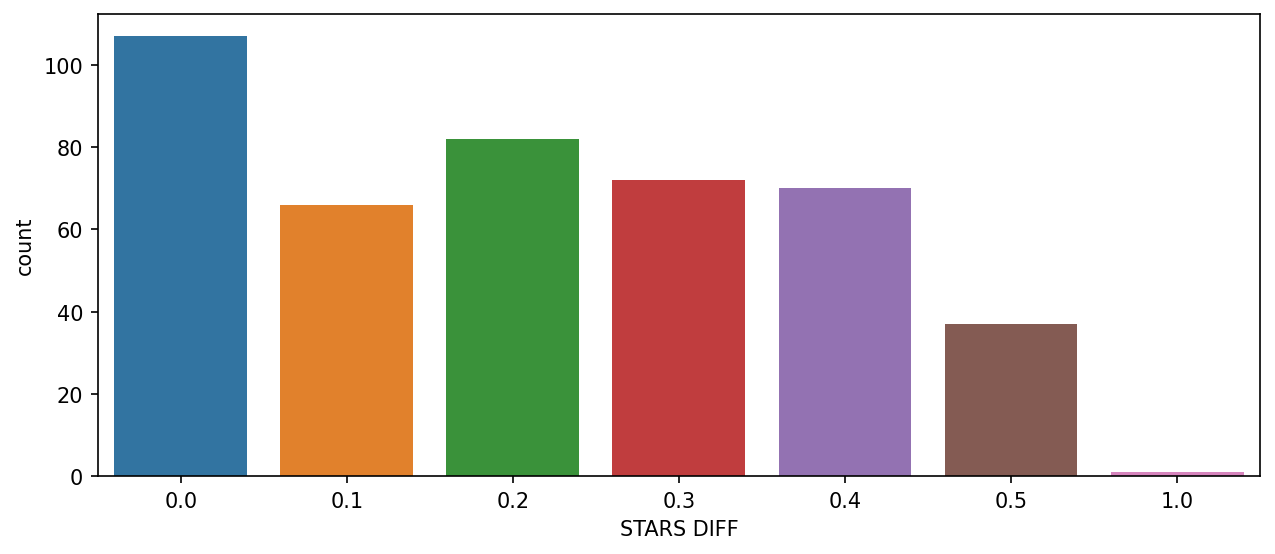

In [64]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=df2,x='STARS DIFF')

In [65]:
df2[df2['STARS DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [66]:
df1

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [68]:
df1.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

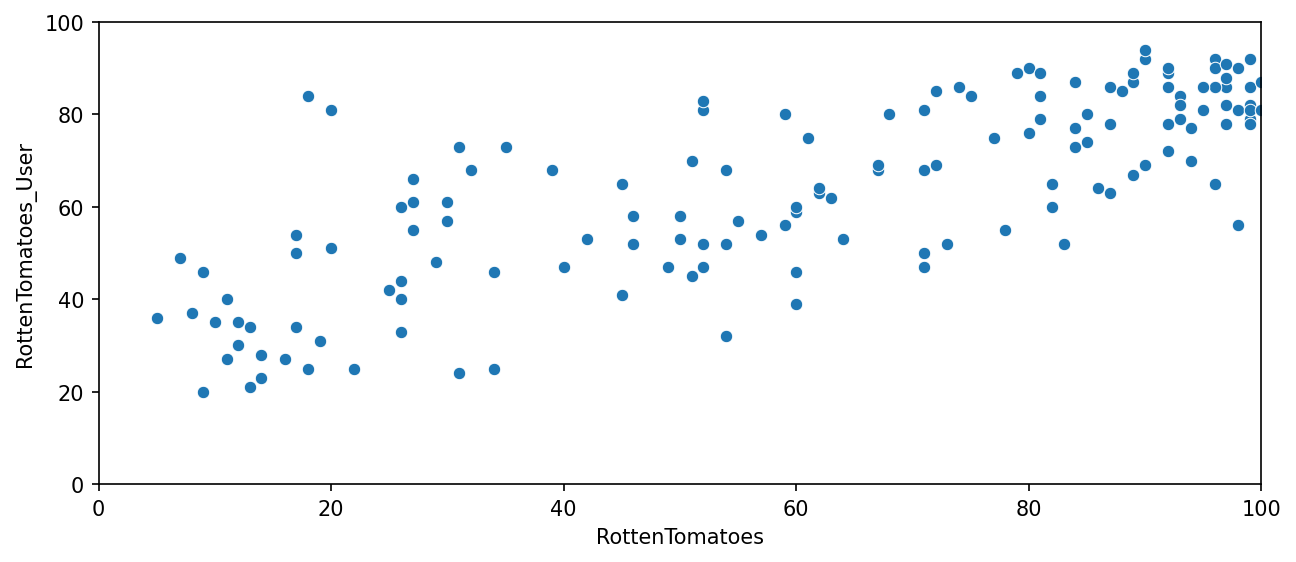

In [69]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df1,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

In [70]:
df1.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [71]:
df1['RT_Diff']=df1['RottenTomatoes']-df1['RottenTomatoes_User']

In [72]:
df1['RT_Diff'].apply(abs).mean()

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

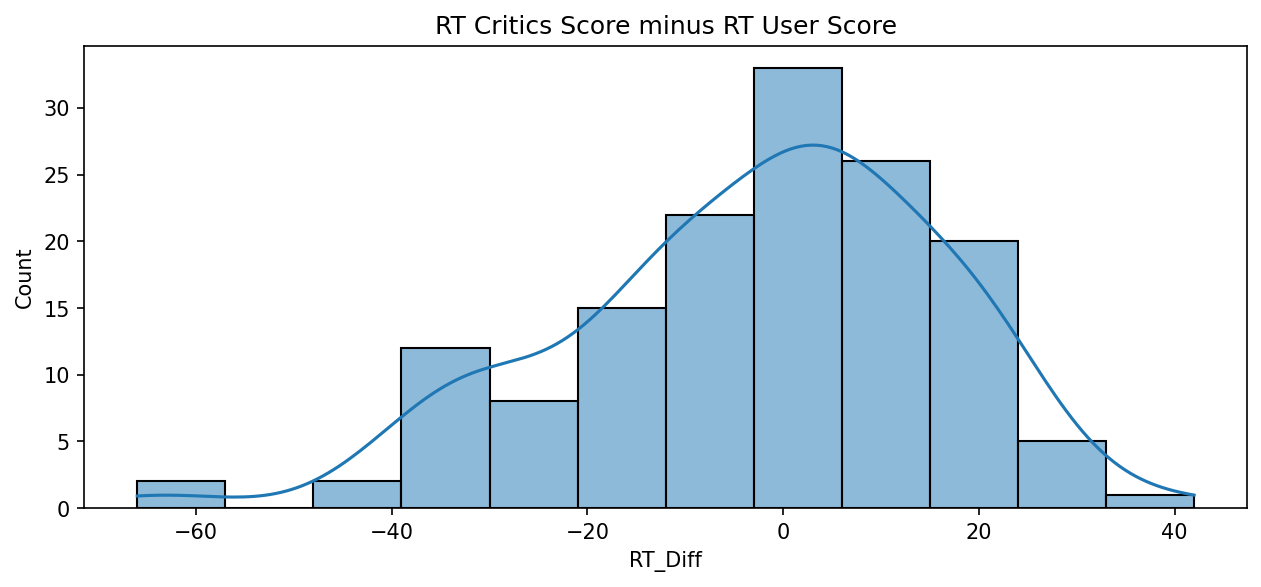

In [73]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(df1,x='RT_Diff',kde=True)
plt.title('RT Critics Score minus RT User Score')

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and RT User Score')

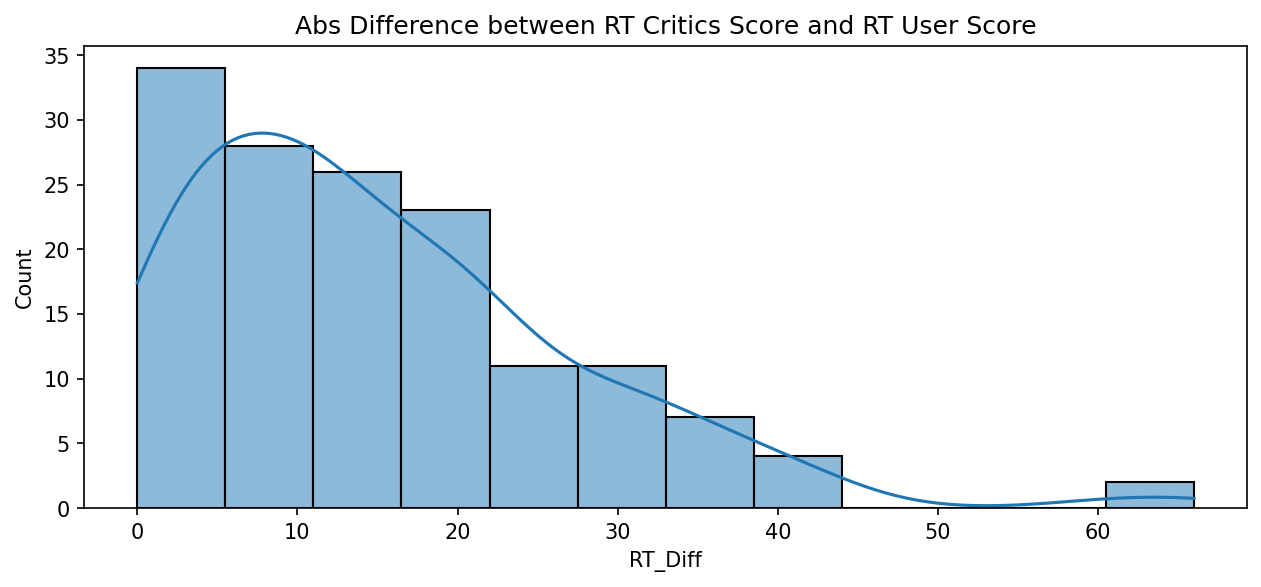

In [74]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(df1,x=df1['RT_Diff'].apply(abs),kde=True)
plt.title('Abs Difference between RT Critics Score and RT User Score')

In [75]:
print('Users Love but Critics Hate')
df1.nsmallest(5,'RT_Diff')[['FILM','RT_Diff']]

Users Love but Critics Hate


,FILM,RT_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [76]:
print('Critics Love, but Users Hate')
df1.nlargest(5,'RT_Diff')[['FILM','RT_Diff']]

Critics Love, but Users Hate


,FILM,RT_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


(0.0, 10.0)

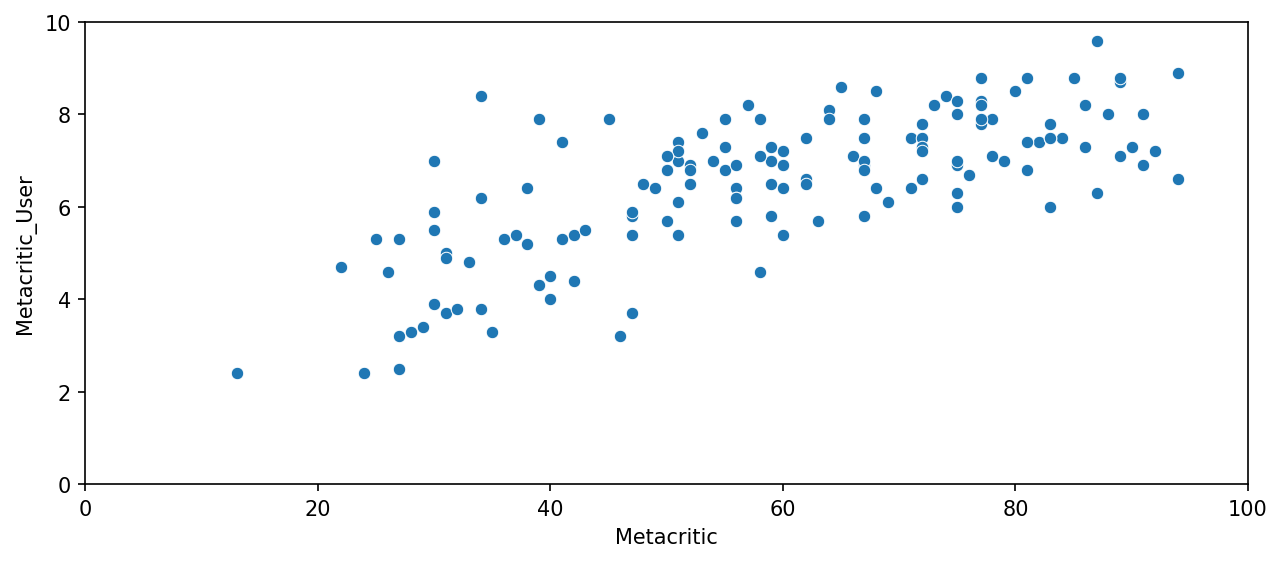

In [77]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df1,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

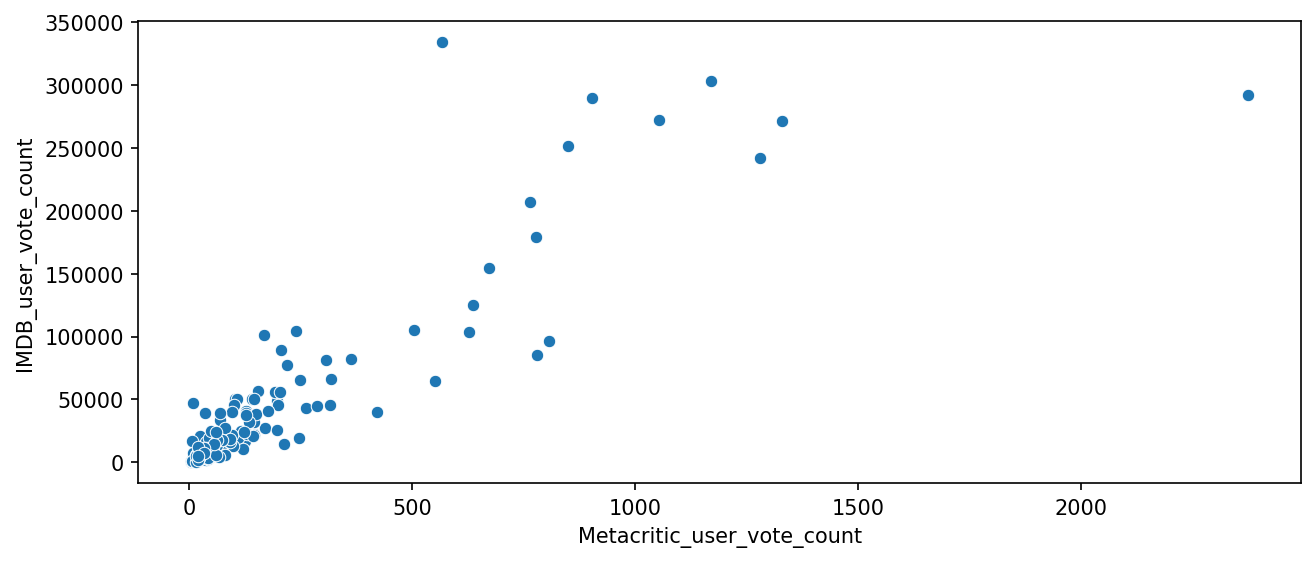

In [78]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df1,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [79]:
df1.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [80]:
df1.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [81]:
df = pd.merge(df1,df2,on='FILM',how='inner')

In [82]:
df

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff,STARS,RATING,VOTES,YEAR,STARS DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,4.0,4.0,1348,2015,0.0
141,'71 (2015),97,82,83,7.5,7.2,60,24116,15,3.5,3.5,192,2015,0.0
142,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,3.5,3.5,118,2014,0.0
143,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,3.5,3.5,59,2015,0.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   RT_Diff                     145 non-null    int64  
 9   STARS                       145 non-null    float64
 10  RATING                      145 non-null    float64
 11  VOTES                       145 non-null    int64  
 12  YEAR                        145 non-null    object 
 13  STARS DIFF                  145 non

In [84]:
df.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff,STARS,RATING,VOTES,STARS DIFF
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069,4.086207,3.841379,3817.696552,0.244828
std,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488,0.541169,0.502437,6368.668671,0.152721
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000,3.000000,2.700000,35.000000,0.000000
25%,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000,3.500000,3.500000,218.000000,0.100000
50%,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000,4.000000,3.900000,1430.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000,4.500000,4.200000,4279.000000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000,5.000000,4.800000,34846.000000,0.500000


In [85]:
df['RT_Norm']=np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm']=np.round(df['RottenTomatoes_User']/20,1)
df['Metacritic_Norm']=np.round(df['Metacritic']/20,1)
df['Metacritic_User_Norm']=np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm']=np.round(df['IMDB']/2,1)

In [90]:
df

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff,STARS,RATING,VOTES,YEAR,STARS DIFF,RT_Norm,RTU_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015,0.5,3.7,4.3,3.3,3.6,3.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015,0.5,4.2,4.0,3.4,3.8,3.6
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015,0.5,4.0,4.5,3.2,4.0,3.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015,0.5,0.9,4.2,1.1,2.4,2.7
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015,0.5,0.7,1.4,1.4,1.7,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,4.0,4.0,1348,2015,0.0,4.4,3.9,3.4,4.0,3.7
141,'71 (2015),97,82,83,7.5,7.2,60,24116,15,3.5,3.5,192,2015,0.0,4.8,4.1,4.2,3.8,3.6
142,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,3.5,3.5,118,2014,0.0,4.8,3.9,4.4,4.4,3.7
143,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,3.5,3.5,59,2015,0.0,5.0,4.0,4.5,3.6,3.9


In [91]:
normalized_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Metacritic_Norm','Metacritic_User_Norm','IMDB_Norm']]

In [92]:
normalized_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,5.0,4.5,3.7,4.3,3.3,3.6,3.9
1,5.0,4.5,4.2,4.0,3.4,3.8,3.6
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,3.5,3.0,0.7,1.4,1.4,1.7,2.6


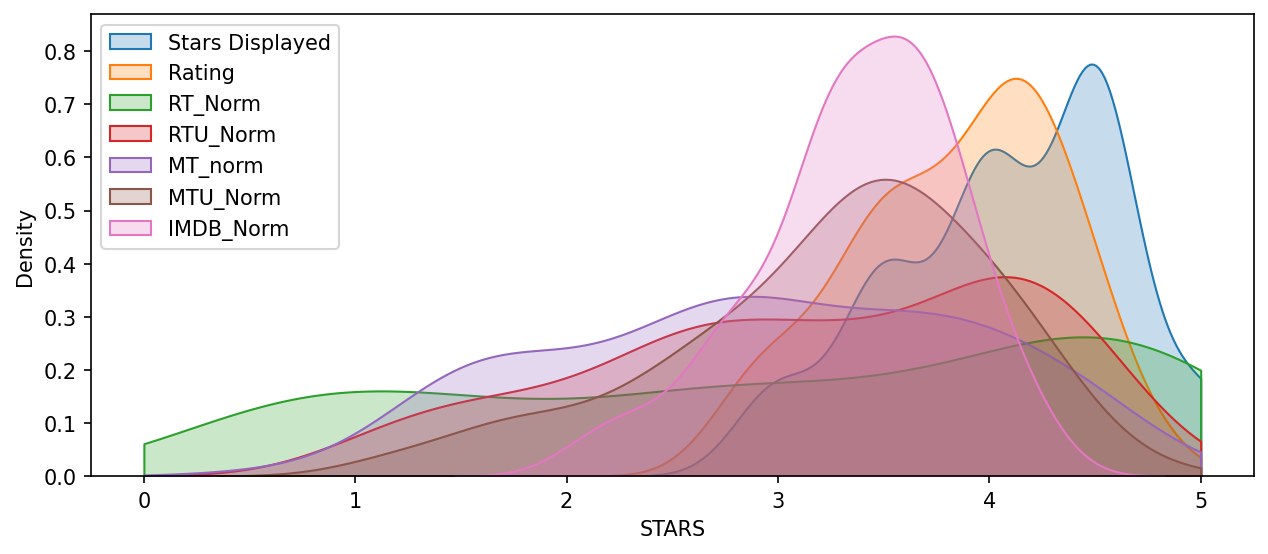

In [97]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=normalized_scores,x='STARS',fill=True,label='Stars Displayed',clip=[0,5])
sns.kdeplot(data=normalized_scores,x='RATING',fill=True,label='Rating',clip=[0,5])
sns.kdeplot(data=normalized_scores,x='RT_Norm',fill=True,label='RT_Norm',clip=[0,5])
sns.kdeplot(data=normalized_scores,x='RTU_Norm',fill=True,label='RTU_Norm',clip=[0,5])
sns.kdeplot(data=normalized_scores,x='Metacritic_Norm',fill=True,label='MT_norm',clip=[0,5])
sns.kdeplot(data=normalized_scores,x='Metacritic_User_Norm',fill=True,label='MTU_Norm',clip=[0,5])
sns.kdeplot(data=normalized_scores,x='IMDB_Norm',fill=True,label='IMDB_Norm',clip=[0,5])

plt.legend(loc='upper left')

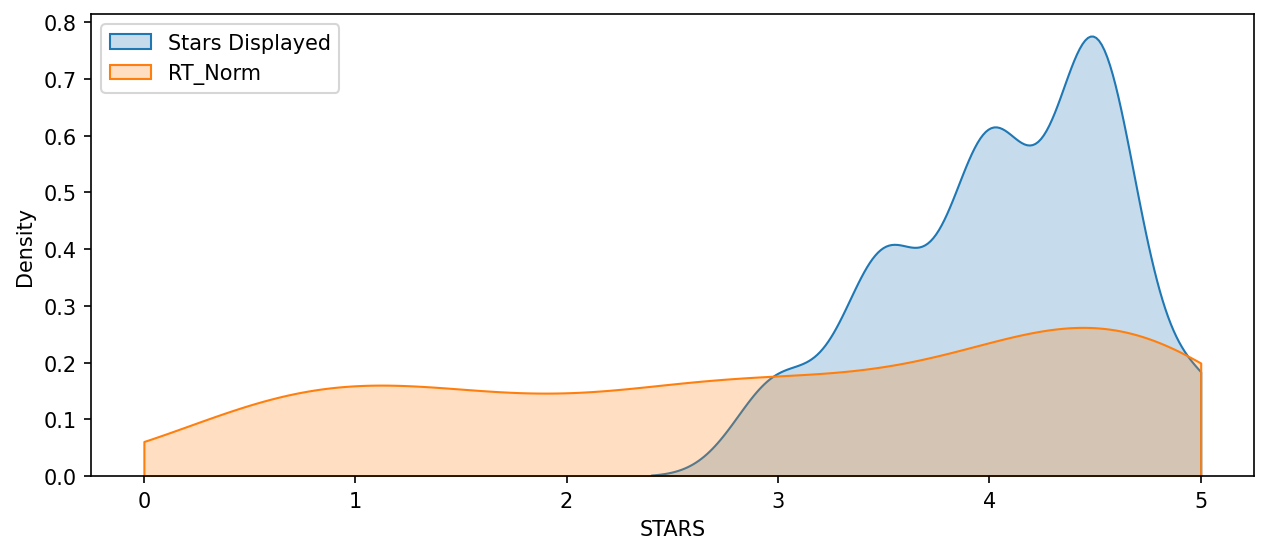

In [98]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=normalized_scores,x='STARS',fill=True,label='Stars Displayed',clip=[0,5])
sns.kdeplot(data=normalized_scores,x='RT_Norm',fill=True,label='RT_Norm',clip=[0,5])

plt.legend(loc='upper left')

<AxesSubplot:ylabel='Count'>

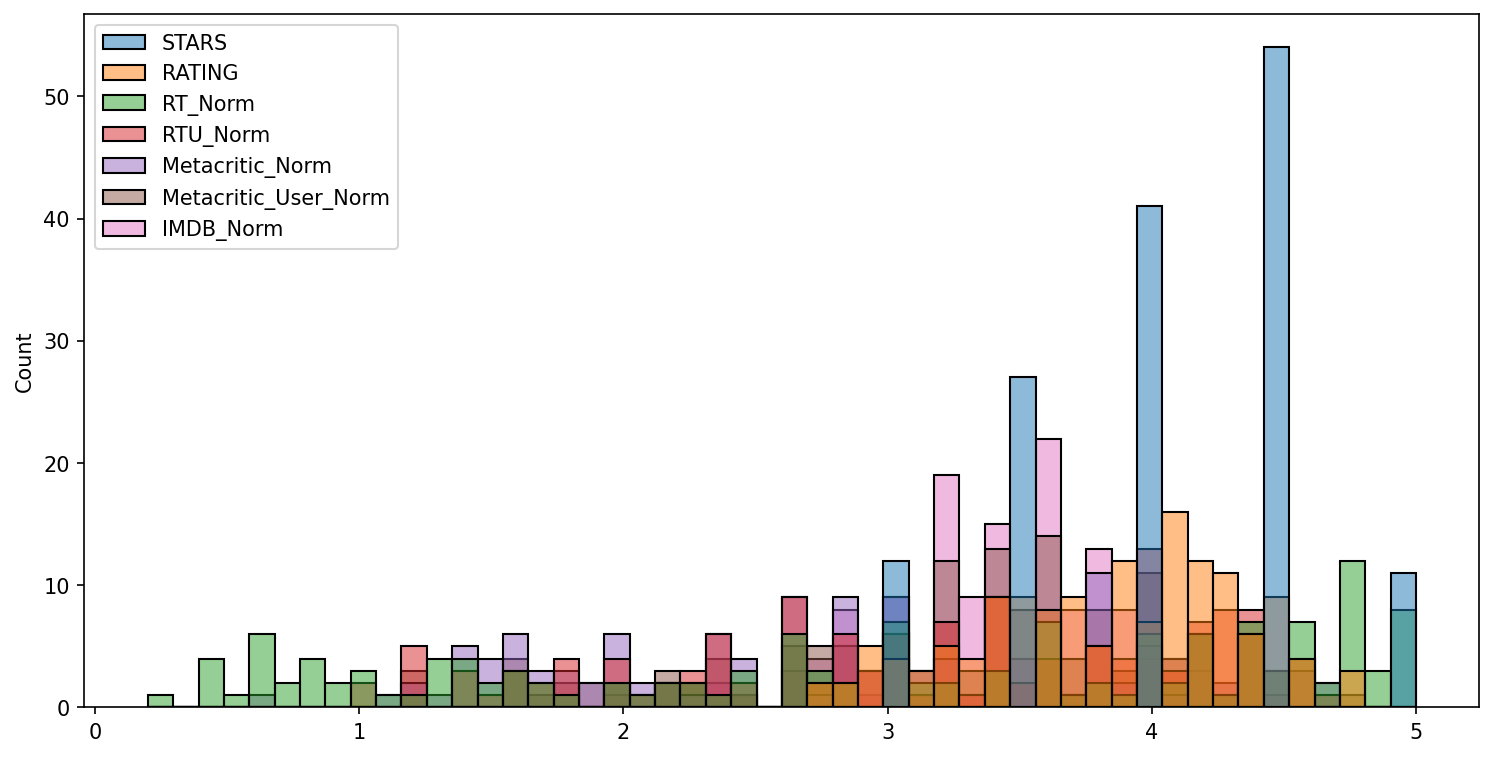

In [102]:
plt.figure(figsize=(12,6),dpi=150)
sns.histplot(normalized_scores,bins=50)

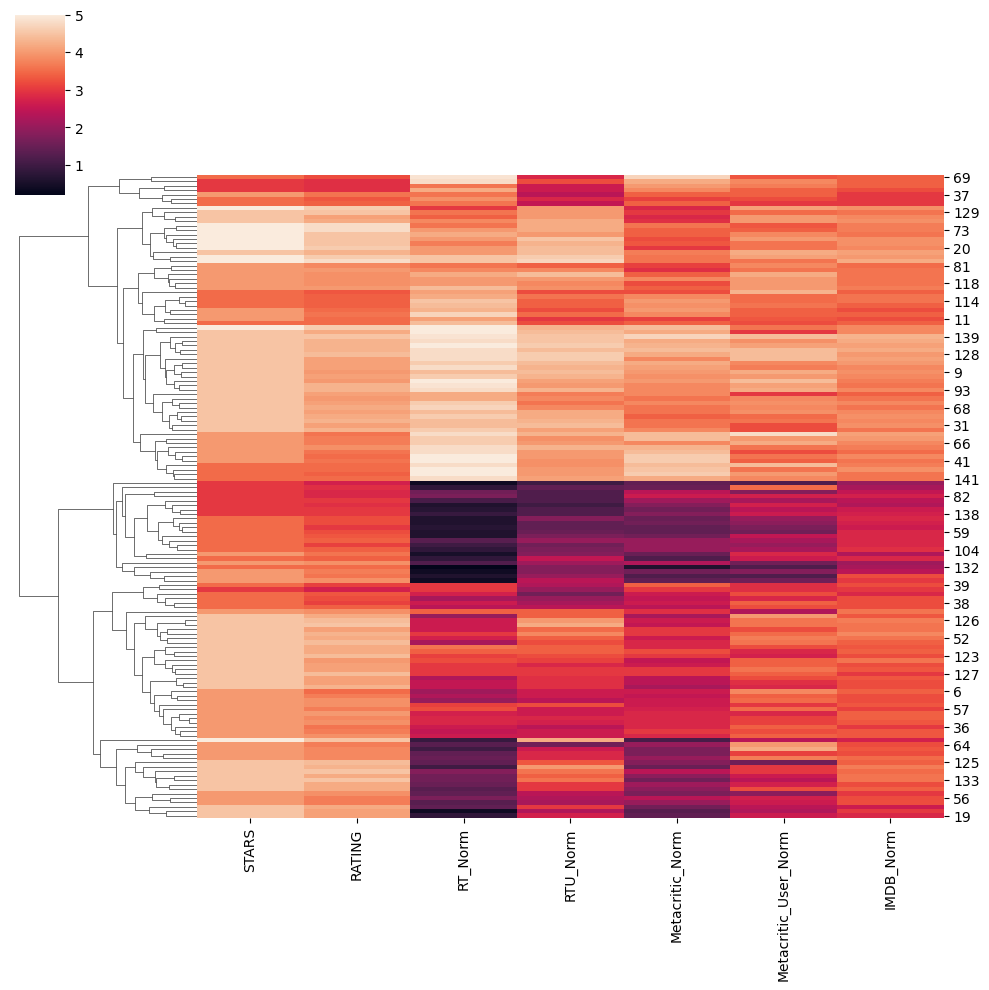

In [117]:
sns.clustermap(normalized_scores,col_cluster=False)

In [110]:
norm_fims=df[['STARS','RATING','RT_Norm','RTU_Norm','Metacritic_Norm','Metacritic_User_Norm','IMDB_Norm','FILM']]

In [111]:
norm_fims.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm,FILM
132,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
15,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
48,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
53,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
105,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
33,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
35,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
58,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
59,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
60,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Text(0.5, 1.0, "Ratings for RT Critic's 10 Worst Reviewed Films")

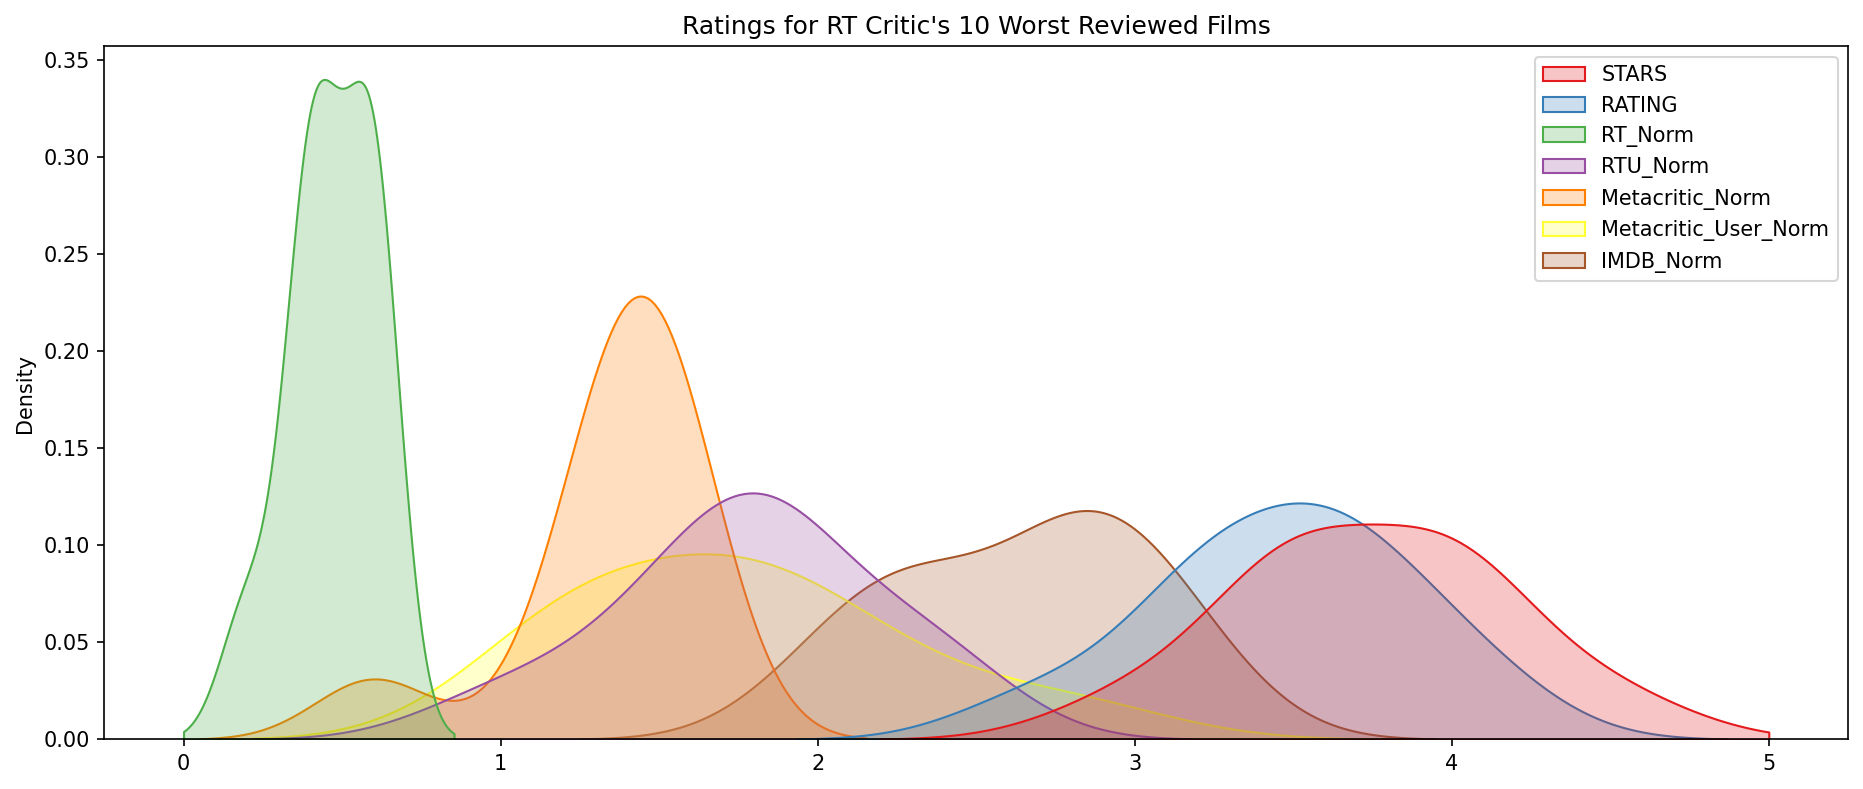

In [113]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_fims.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")

In [116]:
norm_fims.iloc[15]

STARS                              4.5
RATING                             4.1
RT_Norm                            0.4
RTU_Norm                           2.3
Metacritic_Norm                    1.3
Metacritic_User_Norm               2.3
IMDB_Norm                          3.0
FILM                    Taken 3 (2015)
Name: 15, dtype: object